# CNN을 이용한 분류 (CIFAR10)

합성곱 신경망(Convolutional Neural Network)를 이용한 이미지 분류

입력데이터를 특정크기의 filter를 이용한 합성곱 연산으로 output feature map을 도출하는 방법

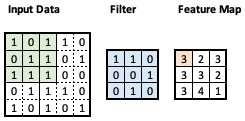

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd/content/gdrive/My Drive/Deep_learning_K&P

/content/gdrive/My Drive/Deep_learning_K&P


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

from keras.utils import to_categorical

from keras.models import load_model

from keras.datasets import cifar10

import matplotlib.pyplot as plt

## CIFAR10 데이터 불러오기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


CIFAR 10은 32 x 32 크기의 이미지 데이터에 채널 3개로 이루어져있다.

In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## Preprocessing

이미지 RGB 채널은 각각 0 ~ 255까지의 값을 갖고 있다.
이를 0 ~ 1사이의 값을 갖도록 normalization을 해준다.

In [ ]:
train_images = train_images.astype('float32') / 225.0
test_images = test_images.astype('float32') / 225.0

## label도 one-hot-encoding으로 변환
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

## CNN 모델 구축

In [ ]:
model = Sequential()

model.add(Conv2D(6, (5,5), activation='relu', padding='same', input_shape=(32,32,3)))
# output_channel=6, padding => same:출력 이미지 사이즈가 입력이미지 사이즈와 동일하다. stride = 1(default)
model.add(MaxPool2D(pool_size=(2,2)))
# kernel_size = 2, stride = 2
model.add(Conv2D(16, (5,5), activation='relu', padding='same'))
# output_channel=16
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               123000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## 모델 학습하기

In [ ]:
history = model.fit(train_images, train_labels, batch_size=8, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 57s 9ms/step - loss: 1.6676 - acc: 0.3953
Epoch 2/10
6250/6250 [==============================] - 56s 9ms/step - loss: 1.1955 - acc: 0.5748
Epoch 3/10
6250/6250 [==============================] - 56s 9ms/step - loss: 1.0619 - acc: 0.6239
Epoch 4/10
6250/6250 [==============================] - 56s 9ms/step - loss: 0.9710 - acc: 0.6567
Epoch 5/10
6250/6250 [==============================] - 55s 9ms/step - loss: 0.8875 - acc: 0.6864
Epoch 6/10
6250/6250 [==============================] - 55s 9ms/step - loss: 0.8269 - acc: 0.7053
Epoch 7/10
6250/6250 [==============================] - 55s 9ms/step - loss: 0.7799 - acc: 0.7229
Epoch 8/10
6250/6250 [==============================] - 56s 9ms/step - loss: 0.7226 - acc: 0.7416
Epoch 9/10
6250/6250 [==============================] - 56s 9ms/step - loss: 0.6873 - acc: 0.7570
Epoch 10/10
6250/6250 [==============================] - 57s 9ms/step - loss: 0.6362 - acc: 0.7763


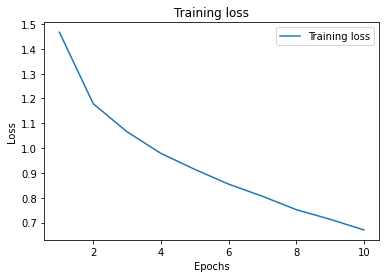

In [ ]:
loss = history.history['loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.title("Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## 모델 저장 및 불러오기

In [ ]:
PATH = './models/keras_cifar_net.pth'
model.save(PATH)

model = load_model(PATH)

INFO:tensorflow:Assets written to: ./models/keras_cifar_net.pth/assets



## 모델 평가

In [ ]:
test_loss_score, test_acc_score = model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 15ms/step - loss: 1.2406 - acc: 0.6186


In [ ]:
print(f"test_loss_score = {test_loss_score}, test_acc_score = {test_acc_score}")

test_loss_score = 1.2406400442123413, test_acc_score = 0.6186000108718872
